In [321]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

#https://www.quantinsti.com/blog/trading-using-machine-learning-python-svm-support-vector-machine/

# https://www2.eecs.berkeley.edu/Pubs/TechRpts/2010/EECS-2010-63.pdf

In [322]:
tickers = ['SPY', 'VWO','IWM',]

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2010 until 10/31/2017.
start_date = '2010-01-03'
end_date = '2017-10-31'

panel_data = data.DataReader(tickers, data_source, start_date, end_date)


In [323]:
volume=panel_data.loc['Volume']


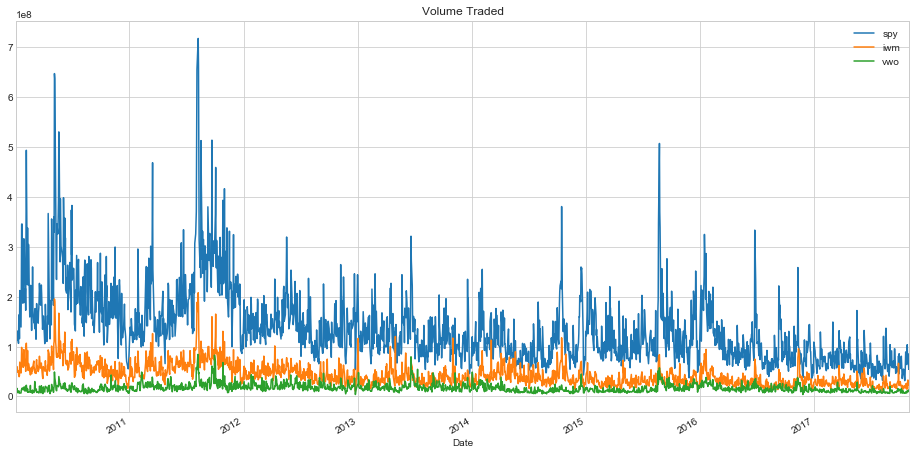

In [324]:
volume['SPY'].plot(label='spy',figsize=(16,8),title='Volume Traded')
volume['IWM'].plot(label='iwm')
volume['VWO'].plot(label='vwo')
plt.legend()



In [325]:
close = panel_data.loc['Close']
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1972 (major_axis) x 3 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2017-10-31 00:00:00 to 2010-01-04 00:00:00
Minor_axis axis: IWM to VWO

In [326]:
#get all weekdays
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

#reindex close using all_weekdays as the new index to align existing prices

close = close.reindex(all_weekdays)

close.head(5)

,IWM,SPY,VWO
2010-01-04,63.980000,113.330002,42.400002
2010-01-05,63.759998,113.629997,42.540001
2010-01-06,63.700001,113.709999,42.799999
2010-01-07,64.169998,114.190002,42.430000
2010-01-08,64.519997,114.570000,42.689999


In [327]:
close.describe()

,IWM,SPY,VWO
count,1972.000000,1972.000000,1972.000000
mean,101.151658,172.834741,40.818732
std,23.820968,42.325518,4.020758
min,58.680000,102.199997,28.549999
25%,79.785000,132.634995,38.417499
50%,106.594997,178.805000,41.060001
75%,118.517500,208.009995,43.382500
max,150.330002,257.709991,50.709999


In [328]:
adj_close=panel_data.loc['Adj Close']

all_weekdays=pd.date_range(start=start_date,end=end_date,freq='B')

adj_close = adj_close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument, like so:
# : adj_close=adj_close.fillna(method='ffill')


In [329]:
adj_close.head(5)


,IWM,SPY,VWO
2010-01-04,57.135605,96.833946,34.940769
2010-01-05,56.939121,97.090271,35.056145
2010-01-06,56.885544,97.158661,35.270401
2010-01-07,57.305260,97.568771,34.965488
2010-01-08,57.617809,97.893463,35.179749


In [330]:
vwo = adj_close['VWO']
spy = adj_close['SPY']
iwm = adj_close['IWM']


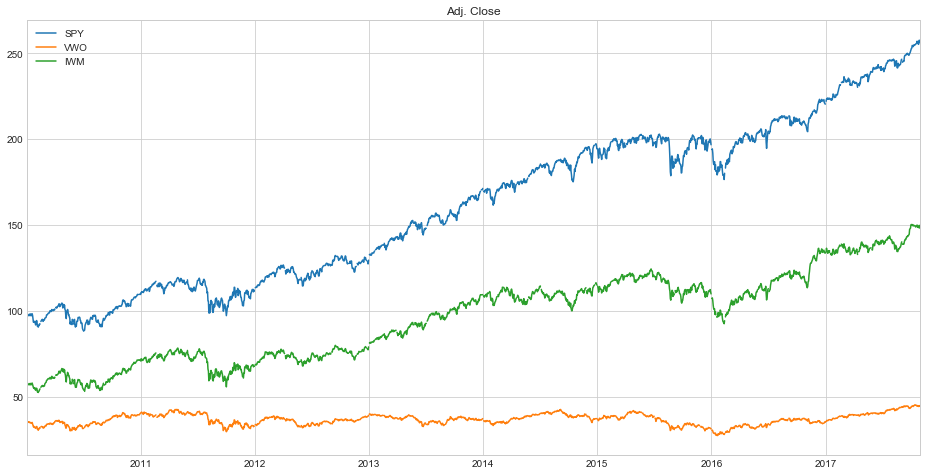

In [331]:
spy.plot(label='SPY',figsize=(16,8),title='Adj. Close')
vwo.plot(label='VWO')
iwm.plot(label='IWM')
plt.legend()


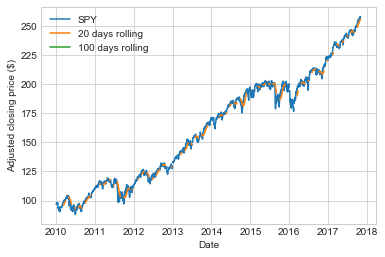

In [334]:
#Moving Average, 20 day and 100 day 

spy_ma20 = spy.rolling(20).mean()
spy_ma100 = spy.rolling(100).mean()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(spy.index, spy, label='SPY')
ax.plot(spy_ma20.index, spy_ma20, label='20 days rolling')
ax.plot(spy_ma100.index,spy_ma100, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()

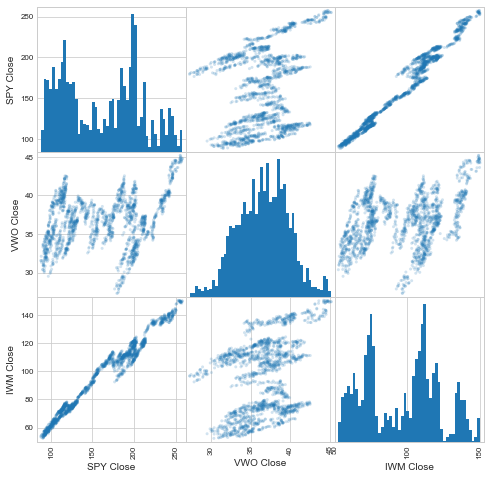

In [335]:
from pandas.plotting import scatter_matrix
#link together by column
etf_comp = pd.concat([spy,vwo,iwm],axis=1)
#name columns
etf_comp.columns = ['SPY Close','VWO Close','IWM Close']
scatter_matrix(etf_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});


In [338]:
# Calculate Returns
#df.pct_change(periods=1(default), fill_method='pad', limit=None, freq=None, **kwargs)[source]

returns = adj_close.pct_change(1)
returns.head()

#sns.corrplot(returns.dropna(), annot=True)


,IWM,SPY,VWO
2010-01-04,NaN,NaN,NaN
2010-01-05,-0.003439,0.002647,0.003302
2010-01-06,-0.000941,0.000704,0.006112
2010-01-07,0.007378,0.004221,-0.008645
2010-01-08,0.005454,0.003328,0.006128


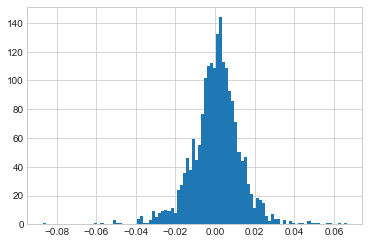

In [339]:
returns['IWM'].hist(bins=100)


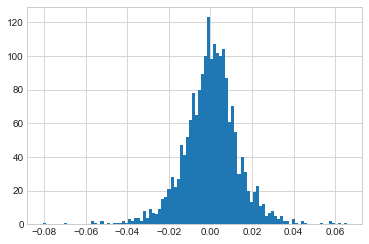

In [340]:
returns['VWO'].hist(bins=100)

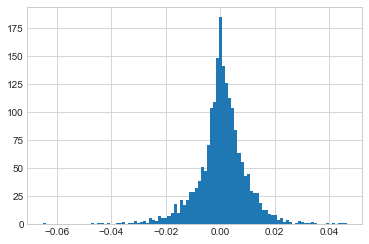

In [341]:
returns['SPY'].hist(bins=100)


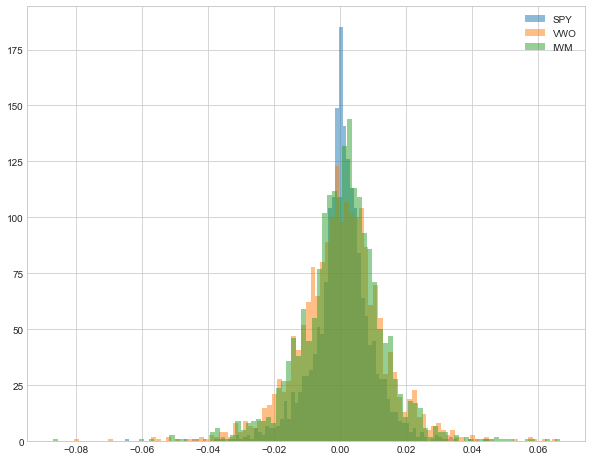

In [342]:
returns['SPY'].hist(bins=100, label='SPY',figsize=(10,8),alpha=0.5)
returns['VWO'].hist(bins=100,label='VWO',alpha=0.5)
returns['IWM'].hist(bins=100,label='IWM',alpha=0.5)
plt.legend()

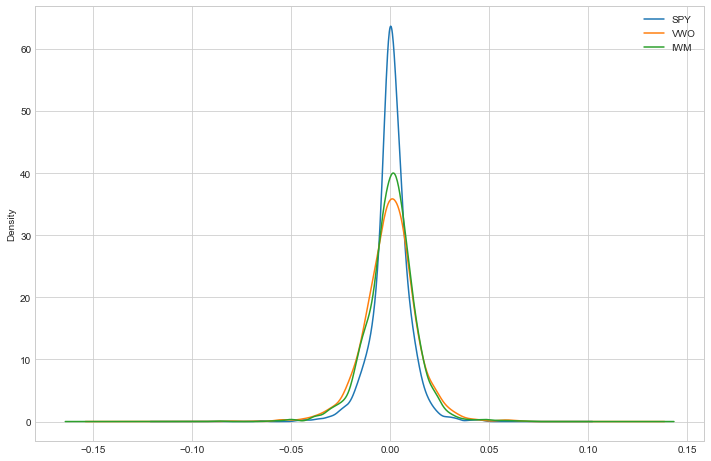

In [343]:
returns['SPY'].plot(kind='kde',label='SPY',figsize=(12,8))
returns['VWO'].plot(kind='kde',label='VWO')
returns['IWM'].plot(kind='kde',label='IWM')
plt.legend()

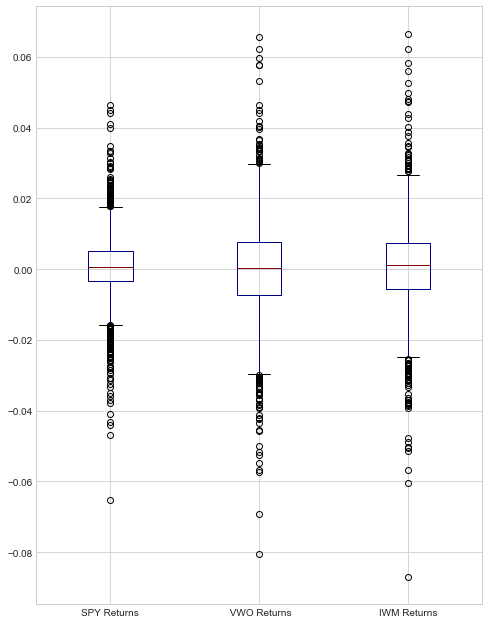

In [344]:
box_df = pd.concat([returns['SPY'],returns['VWO'],returns['IWM']],axis=1)
box_df.columns = ['SPY Returns',' VWO Returns','IWM Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

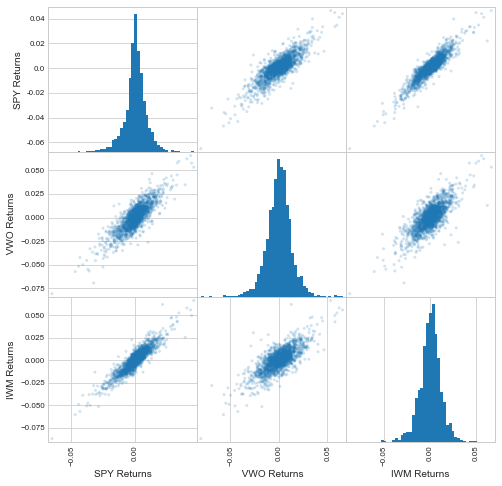

In [345]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [350]:
#Correlations

corr=returns.corr()
corr

,IWM,SPY,VWO
IWM,1.000000,0.912162,0.761712
SPY,0.912162,1.000000,0.835412
VWO,0.761712,0.835412,1.000000


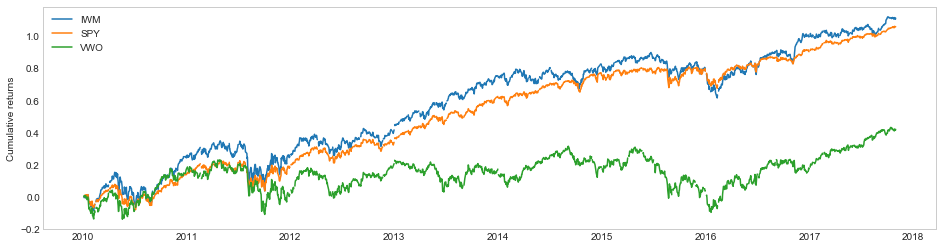

In [354]:
# Plot all returns

fig= plt.figure(figsize=[16,9])
ax = fig.add_subplot(2,1,1)

for c in returns:
    ax.plot(returns.index, returns[c].cumsum(), label=str(c))
    
ax.set_ylabel('Cumulative returns')
ax.legend(loc='best')
ax.grid()
plt.show()

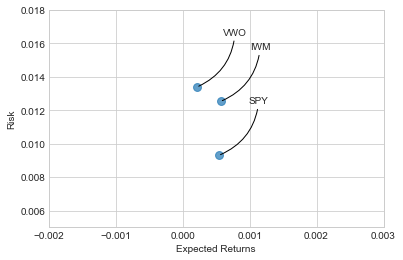

In [373]:
#Some risk analysis, Risk vs Return

area = np.pi*20

plt.scatter(returns.mean(),returns.std(),alpha=0.7,s=area)

plt.ylim([0.005,0.018])
plt.xlim([-0.002,0.003])

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

#Label scatter plots, more info below:
#http://matplotlib.org/users/annotations_guide.html

for label, x,y in zip(returns.columns,returns.mean(),returns.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),
                textcoords='offset points',ha='right',va='bottom',
                arrowprops= dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))
    

In [381]:
#Value at Risk (VaR)

#Simple 5% VaR
print(returns['SPY'].quantile(0.05))
print(returns['IWM'].quantile(0.05))
print(returns['VWO'].quantile(0.05))

# 95% conf. that our daily loss will not exceed 1.5% on SPY

-0.014859224614575839
-0.01897126777639474
-0.020977603547758517


In [382]:
#VaR using Monte Carlo method;Geometric Brownian Motion

days=365
dt= 1/ 365
mu = returns.mean()['SPY']
sigma = returns.std()['SPY']

In [398]:
def monte_carlo(start_price,mu,sigma,days):
    
    price=np.zeros(days)
    
    price[0] = start_price
    
    shock = np.zeros(days)
    
    drift = np.zeros(days)
    
    for x in range(1,days):
        drift[x]= mu * dt
        epsilon = np.random.normal(0,1)
        shock[x]= sigma*epsilon*np.sqrt(dt)
        price[x]= price[x-1] + price[x-1]*(drift[x] + shock[x])
        
    return price
        

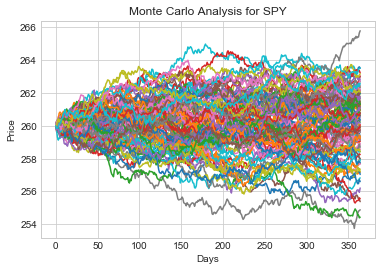

In [401]:
# make start price = T-1
start_price=260

for run in range(100):
    plt.plot(monte_carlo(start_price,mu,sigma,days))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for SPY')

In [403]:
# Repeat for large number of runs

runs=10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = monte_carlo(start_price,mu,sigma,days)[days-1];
    

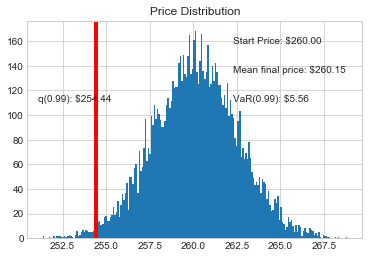

In [407]:
#Plot the results

q = np.percentile(simulations, 1)

plt.hist(simulations,bins=200)

#Starting Price
plt.figtext(0.6, 0.8, s="Start Price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title("Price Distribution")

In [2]:
git init
git add README.md
git commit -m "first commit"
git remote add origin https://github.com/Freecoder313/Finance.git
git push -u origin master

SyntaxError: invalid syntax (<ipython-input-2-2b3e65ab5938>, line 1)